In [32]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# MLG CC2 - THE BURMAN TRAVELING SALESMAN PROBLEM (TSP)
 


In [33]:
from pyevolve import G1DList
from pyevolve import GAllele
from pyevolve import GSimpleGA
from pyevolve import Selectors
from pyevolve import Mutators
from pyevolve import Statistics
from pyevolve import Crossovers
from pyevolve import Consts

In [34]:
import numpy as np

#### Provided latitude longitude

In [35]:
# Coordinates given in the assignement
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 
       17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]

LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 
       96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]

# Let's group them together
COORDINATES = list(zip(LAT, LON))

In [36]:
from geopy.distance import geodesic

def geodesic_distance(cityA, cityB):
    """
    return the geodesic distance between A and B in km.
    """
    return geodesic(cityA, cityB).km

In [37]:
def distance_matrix(coords):
    """
    Inspiration: http://www.psychicorigami.com/2007/04/17/tackling-the-travelling-salesman-problem-part-one/
    return the distance matrix
    """
    dim=len(coords)
    dist_mat= np.empty(shape=(dim, dim), dtype=float)
    for i, coordA in enumerate(coords):
        for j,coordB in enumerate(coords):
            dist= geodesic_distance(coordA, coordB)
            dist_mat[i, j] = dist
    
    return dist_mat     

In [38]:
DISTANCE_MATRIX = distance_matrix(COORDINATES)

In [39]:
def tour_length(matrix, tour):
    """
    """
    l = len(tour)
    total=0.0
    
    for i in range(l):
        cityA = tour[i]
        cityB = tour[(i + 1) % l]
        
        total += matrix[cityA, cityB]
    
    return total

In [40]:
def fitness(chromosome):
    distance = tour_length(DISTANCE_MATRIX, chromosome)
    return distance

In [52]:
import sys, random


def Initializator(genome, **args):
    """
    G1DList TSP Initializator
    """
    genome.clearList()
    lst = [i for i in range(genome.getListSize())]
    random.shuffle(lst)
    genome.setInternalList(lst)

In [68]:
import matplotlib.pyplot as plt 


def display_plot(path):
    
    path.append(path[0]) # So we have a complete tour
    res = list(zip(*map(lambda p: COORDINATES[p], path)))
    plt.plot(res[0],res[1], '-o')
    plt.show()

In [78]:
def do_ga(generations, crossover_rate, mutation_rate, population_size, freq_stats):
    """
    Inspiration: http://pyevolve.sourceforge.net/examples.html#example-12-the-travelling-salesman-problem-tsp
    """
    length = len(COORDINATES)
    
    setOfAlleles = GAllele.GAlleles(homogeneous=True)
    lst = [ i for i in range(length) ]
    a = GAllele.GAlleleList(lst)
    setOfAlleles.add(a)
    
    genome = G1DList.G1DList(length)
    genome.setParams(allele=setOfAlleles)
    
    genome.evaluator.set(fitness)
    genome.mutator.set(Mutators.G1DListMutatorSwap)
    genome.crossover.set(Crossovers.G1DListCrossoverOX)
    genome.initializator.set(Initializator)
    
    ga = GSimpleGA.GSimpleGA(genome)
    ga.setGenerations(generations)
    ga.setMinimax(Consts.minimaxType["minimize"])
    ga.setCrossoverRate(crossover_rate)
    ga.setMutationRate(mutation_rate)
    ga.setPopulationSize(population_size)
    
    ga.setElitism(True)

    ga.evolve(freq_stats=freq_stats)
    
    # Take the best and display
    best = ga.bestIndividual()
    sol = best.genomeList

    print(best)
    return sol


In [79]:
# Hyper parameters
GENERATIONS = 1000
CROSSOVER_RATE = 1.0 
MUTATION_RATE = 0.03 
POPULATION_SIZE = 200
FREQ_STATS = 20

solution = do_ga(GENERATIONS, CROSSOVER_RATE, MUTATION_RATE, POPULATION_SIZE, FREQ_STATS)

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw)             [8083.18(8248.66)/5134.20(4937.45)/6735.98(6735.98)]
Gen. 20 (2.00%): Max/Min/Avg Fitness(Raw)             [4616.96(6405.11)/3727.40(3448.39)/3847.46(3847.46)]
Gen. 40 (4.00%): Max/Min/Avg Fitness(Raw)             [4485.32(5972.25)/3640.95(3448.39)/3737.77(3737.77)]
Gen. 60 (6.00%): Max/Min/Avg Fitness(Raw)             [4601.08(7174.96)/3745.67(3448.39)/3834.24(3834.24)]
Gen. 80 (8.00%): Max/Min/Avg Fitness(Raw)             [4528.89(6393.49)/3680.23(3448.39)/3774.08(3774.08)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw)             [4598.93(6830.72)/3734.26(3448.39)/3832.45(3832.45)]
Gen. 120 (12.00%): Max/Min/Avg Fitness(Raw)             [4459.67(5924.96)/3626.20(3448.39)/3716.39(3716.39)]
Gen. 140 (14.00%): Max/Min/Avg Fitness(Raw)             [4480.53(6539.94)/3657.83(3448.39)/3733.78(3733.78)]
Gen. 160 (16.00%): Max/Min/Avg Fitness(Raw)             [4603.17(6375.54)/3718.88(3448.39)/3835.97(3835.97)]
Gen. 180 (18.00%): Max/Min/Avg

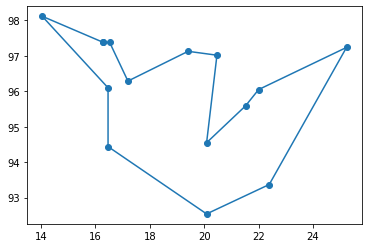

In [80]:
display_plot(solution)